**Email Address: dipuhaider@gmail.com**

**Answer to the Q1**

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("final-employee-ds.csv")
# df

training_hour_arr = df['TrainingHours'].to_numpy(dtype=float)
mean = float(np.nanmean(training_hour_arr))
std = float(np.nanstd(training_hour_arr))

# print(training_hour_arr)
print(mean)
print(std)




24.19
13.842467265628624


**Answer to the Q2**

In [ ]:
import pandas as pd

df = pd.read_csv("final-employee-ds.csv")

df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

dept_median = df.groupby('Department')['Salary'].transform('median')
df['Salary'] = df['Salary'].fillna(dept_median)

calclulate_condition = (df['ExperienceYears'] > 12) & (df['ProjectCount'] > 5)
total_salary_sum = float(df.loc[calclulate_condition, 'Salary'].sum())
print(total_salary_sum)

1985775.5


**Answer to the Q3**

In [ ]:
import pandas as pd

df = pd.read_csv("final-employee-ds.csv")

employees_filter = ((df['Department'].isin(['IT', 'Finance'])) & (df['Age'].between(30, 45)) & (df['PerformanceScore'] > 88))

table = df.loc[employees_filter, ['Name', 'Department', 'Salary', 'PerformanceScore']].copy()
table = table.sort_values('Salary', ascending=False).reset_index(drop=True)

print(table.to_string(index=False))

       Name Department   Salary  PerformanceScore
Employee_95         IT 140386.0                94
Employee_89    Finance 126027.0                92
 Employee_5    Finance  85543.0                97
Employee_33         IT  83919.0                98
Employee_56    Finance  49540.0                94


**Answer to the Q4**

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("final-employee-ds.csv")

df['WorkHoursPerWeek'] = pd.to_numeric(df['WorkHoursPerWeek'])

salary_per_hour = df['WorkHoursPerWeek'] * 4
df['SalaryPerHour'] = np.where(salary_per_hour > 0, df['Salary'] / salary_per_hour, np.nan)

table = df[['Name', 'SalaryPerHour']].nlargest(5, 'SalaryPerHour').reset_index(drop=True)

print(table)


          Name  SalaryPerHour
0  Employee_47     981.278571
1  Employee_28     971.292857
2  Employee_32     967.392857
3  Employee_80     945.335526
4  Employee_81     937.858974


**Answer to the Q5**

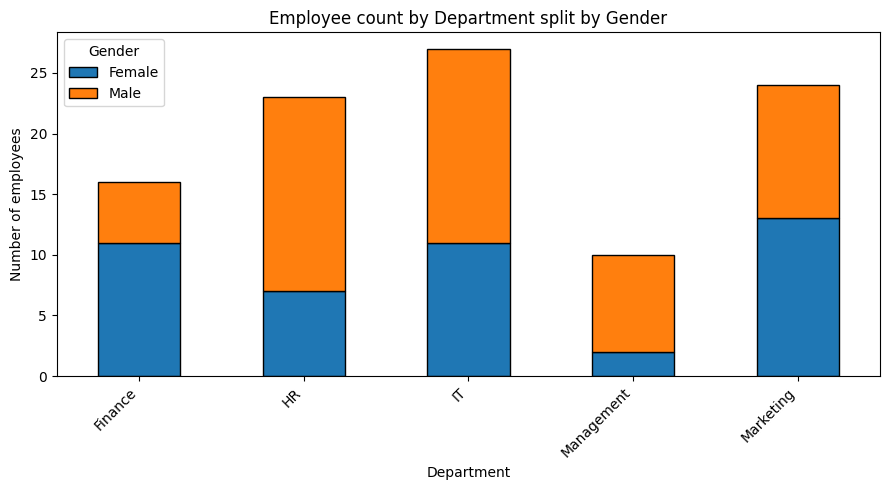

In [ ]:
import matplotlib.pyplot as plt

counts = df.groupby(['Department', 'Gender']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(9,5))
counts.plot(kind='bar', stacked=True, ax=ax, edgecolor='black')
ax.set_xlabel('Department')
ax.set_ylabel('Number of employees')
ax.set_title('Count of Employees by Department and Gender')
ax.legend(title='Gender')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()
